In [1]:
#import libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np


# preprocessing 
from sklearn.preprocessing import StandardScaler ,Imputer ,LabelEncoder
from sklearn.model_selection import train_test_split , GridSearchCV
# model building 
from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier , RandomForestRegressor

# model validation
from sklearn import metrics


# Read the Datasets

In [2]:
# Load the training data set
df_train = pd.read_csv('train.csv')
display(df_train.shape)

(9557, 143)

In [3]:
df_train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [4]:
# Load the testing dataset
df_test =pd.read_csv('test.csv')
display(df_test.shape)

(23856, 142)

In [5]:
df_test.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


# Basic Data Exploration

In [6]:
# some info
display(df_train.info())
print()
display(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


None

In [7]:
# descibre the data
print('Describe the training data')
display(df_train.describe())
print('================================================')
print('Describe the test data')
display(df_test.describe())

Describe the training data


,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,...,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,...,74.222769,1643.774302,19.132887,53.500262,3.844826,3.249485,3.900409,102.588867,1643.774302,3.302292
std,1.504571e+05,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,0.763131,0.680779,1.036574,...,76.777549,1741.197050,18.751395,78.445804,6.946296,4.129547,12.511831,93.516890,1741.197050,1.009565
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,1.000000
25%,8.000000e+04,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,16.000000,289.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,289.000000,3.000000
50%,1.300000e+05,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,36.000000,961.000000,16.000000,36.000000,1.000000,2.250000,0.444444,81.000000,961.000000,4.000000
75%,2.000000e+05,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,2.000000,...,121.000000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,134.560010,2601.000000,4.000000
max,2.353477e+06,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,8.000000,...,441.000000,9409.000000,169.000000,441.000000,81.000000,36.000000,64.000000,1369.000000,9409.000000,4.000000


Describe the test data


,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
count,6.453000e+03,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,5730.000000,23856.000000,23856.000000,...,23856.000000,23856.00000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23825.000000,23856.000000
mean,1.748726e+05,0.050679,4.955776,0.028421,0.992748,0.961603,0.240191,1.348517,0.416541,1.563967,...,34.454183,74.44974,1657.798080,19.113389,54.087232,3.885480,3.564751,4.171669,100.509220,1657.798080
std,1.567887e+05,0.219346,1.539753,0.166174,0.084850,0.192157,0.427208,0.694216,0.713255,0.990171,...,21.696245,76.99701,1753.603406,17.314597,77.312255,6.878967,6.668757,13.105989,89.211063,1753.603406
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.020408,0.000000,0.000000,0.000000
25%,8.000000e+04,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,16.000000,16.00000,256.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,256.000000
50%,1.400000e+05,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,32.000000,36.00000,1024.000000,16.000000,36.000000,1.000000,2.250000,0.444444,75.111115,1024.000000
75%,2.200000e+05,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,1.750000,1.000000,2.000000,...,51.000000,121.00000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,132.250000,2601.000000
max,2.852700e+06,1.000000,15.000000,1.000000,1.000000,1.000000,1.000000,6.000000,6.000000,7.000000,...,97.000000,441.00000,9409.000000,169.000000,441.000000,100.000000,169.000000,64.000000,1296.000000,9409.000000


In [8]:
# check for unique for target variable 
df_train.Target.value_counts()

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

In [9]:
display('Data types of training dataset : ',df_train.dtypes)
print()
display('Data types of testing dataset : ',df_test.dtypes)

'Data types of training dataset : '

Id                  object
v2a1               float64
hacdor               int64
rooms                int64
hacapo               int64
                    ...   
SQBovercrowding    float64
SQBdependency      float64
SQBmeaned          float64
agesq                int64
Target               int64
Length: 143, dtype: object

'Data types of testing dataset : '

Id                  object
v2a1               float64
hacdor               int64
rooms                int64
hacapo               int64
                    ...   
SQBhogar_nin         int64
SQBovercrowding    float64
SQBdependency      float64
SQBmeaned          float64
agesq                int64
Length: 142, dtype: object

In [10]:
# checking for missing values
print('Training data :' ,sum(df_train.isnull().values,0))
print()
print('Testing data :' ,sum(df_test.isnull().values,0))

Training data : [   0 6860    0    0    0    0    0    0 7342    0    0    0    0    0
    0    0    0    0    0    0    0 7928    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    5    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    5    0    0]

Testing data : [    0 17403     0     0     0     0     0     0 18126     0     0     0
     0     0     0     0     0     0     0     0     0 19653     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0    

In [11]:
# Drop the missing value column which too much missing value
training_missing_value = list(zip(df_train.columns ,sum(df_train.isnull().values,0)))
testing_missing_value = list(zip(df_test.columns ,sum(df_test.isnull().values,0)))

## separate the missing value column from dataset and treat them

In [12]:
# for training dataset
df_missing_column_train ={}

for i in training_missing_value:
    if i[:][1]!=0:
        df_missing_column_train.update({i[:][0] :i[:][1]})

    

In [13]:
# for testing dataset
df_missing_column_test ={}

for i in testing_missing_value:
    if i[:][1]!=0:
        df_missing_column_test.update({i[:][0] :i[:][1]})

In [14]:
display(df_missing_column_train )
print()
display(df_missing_column_test)

{'v2a1': 6860, 'v18q1': 7342, 'rez_esc': 7928, 'meaneduc': 5, 'SQBmeaned': 5}

{'v2a1': 17403,
 'v18q1': 18126,
 'rez_esc': 19653,
 'meaneduc': 31,
 'SQBmeaned': 31}

In [15]:
#drop the larger missing values
df_train.drop(['v2a1','v18q1','rez_esc'],axis=1,inplace=True) # drop from training dataset
df_test.drop(['v2a1','v18q1','rez_esc'],axis=1,inplace=True) # drop from testing dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000009FBA4CA780>,
      dtype=object)

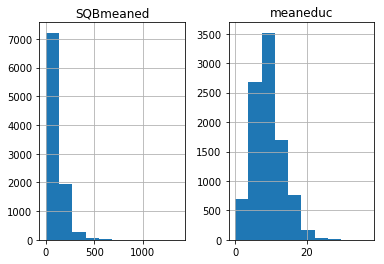

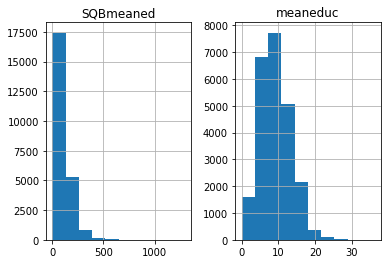

In [16]:
# fill the remaining for that we need to check skewness of data
import matplotlib.pyplot as plt
%matplotlib inline
df_train.hist(['meaneduc','SQBmeaned'])
df_test.hist(['meaneduc','SQBmeaned'])

In [17]:
#now as data is right skewed so we can fill the null value with median value .
df_train.fillna(df_train.median(),inplace=True)

In [18]:
df_test.fillna(df_test.median(),inplace=True)

In [19]:
# check for missing value
print(sum(df_train.isnull().values,0))
print()
print(sum(df_test.isnull().values,0))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


# Check if there are any biases in your dataset.


In [20]:
#hacdor ,hacapo --- rooms
#v18q ,v18q1 ---tablets
#r4t3 ,hogar_total -- total family member
# for biases we need to remove one of the column from them 
#training dataset
df_train.drop(['hacapo','r4t3'], axis=1 , inplace=True)

# testing dataset
df_test.drop(['hacapo','r4t3'], axis=1 , inplace=True)

# Check whether all members of the house have the same poverty level.


In [21]:
df_train_a = df_train.duplicated(['idhogar'])
df_train_b = df_train.duplicated(['idhogar', 'Target'])
df_train[(df_train_a == df_train_b) == False][['idhogar','Target']]

,idhogar,Target
283,4b6077882,2
290,6833ac5dc,1
322,43b9c83e5,1
410,5c3f7725d,2
513,0f9494d3a,3
...,...,...
9104,cc971b690,2
9113,7e9d58c5c,1
9370,e235a4eec,2
9475,c7ce4e30c,1


# Check if there is a house without a family head.


In [22]:
# parentesco1 represent head of family value 0 means there is no family head 
df_train[df_train.parentesco11==0][['idhogar','parentesco11']]

,idhogar,parentesco11
0,21eb7fcc1,0
1,0e5d7a658,0
2,2c7317ea8,0
3,2b58d945f,0
4,2b58d945f,0
...,...,...
9552,d6c086aa3,0
9553,d6c086aa3,0
9554,d6c086aa3,0
9555,d6c086aa3,0


In [23]:
# now we can check the how many family do not have family head 
df_train[df_train.parentesco11==0][['Id','parentesco11']].count()

Id              9436
parentesco11    9436
dtype: int64

# Set poverty level of the members and the head of the house within a family.


In [24]:
train_data_new = df_train.copy(deep=True)
fam_ids = df_train[df_train.duplicated(['idhogar'])]['idhogar'].unique()
for i in fam_ids:
    df = df_train[df_train['idhogar'] == i]
    if (df['parentesco1'] == 1).any():
        val = df_train.loc[df[df['parentesco1'] == 1].index.tolist()[0],'Target']
        ix = df[df['parentesco1'] == 1].index.tolist()[0]
        print(ix, val)
    train_data_new.loc[df_train[df_train['idhogar'] == i].index.tolist(), 'Target'] = val

5 4
8 4
12 4
13 4
18 4
20 4
21 4
23 4
27 4
30 4
33 4
39 4
40 4
43 4
45 4
49 4
53 2
56 4
59 4
61 4
68 4
72 4
74 4
77 4
80 4
84 4
86 4
91 4
95 4
98 4
102 4
106 4
109 4
112 4
119 4
124 2
128 4
132 4
134 4
139 4
141 3
142 4
153 4
157 1
165 4
171 2
174 3
182 4
184 2
193 2
197 2
200 1
204 4
208 4
210 4
213 4
215 2
218 4
223 4
225 4
226 4
234 4
238 4
243 4
245 4
248 4
254 4
255 4
261 4
264 4
269 4
274 4
280 4
282 1
288 2
294 4
300 4
302 4
306 4
310 4
314 2
316 4
321 2
324 4
328 4
332 4
334 4
337 4
340 4
343 4
346 4
349 4
350 4
353 4
357 4
359 4
364 4
365 4
370 4
374 4
375 3
379 4
386 4
389 4
390 4
395 4
397 4
400 4
405 4
412 3
415 4
416 4
421 4
424 4
426 4
428 4
433 1
442 4
448 4
452 4
455 4
457 4
459 4
462 4
467 4
472 4
473 4
476 4
480 3
481 4
485 4
486 4
492 2
494 4
498 3
505 4
506 4
509 4
511 2
517 4
520 2
527 4
530 3
531 4
536 3
541 4
543 4
549 4
553 4
558 4
561 4
564 4
568 4
571 4
573 4
577 4
579 2
581 4
583 4
587 4
593 4
595 4
597 4
601 2
604 3
609 4
610 1
616 4
622 4
624 4
631 4
635 2


4606 4
4609 3
4613 4
4615 4
4617 2
4619 4
4623 3
4625 4
4627 4
4634 4
4636 4
4644 3
4648 4
4653 4
4657 4
4660 4
4662 4
4667 4
4671 4
4674 4
4676 4
4679 4
4685 2
4686 4
4688 4
4694 4
4698 2
4703 1
4705 4
4707 4
4711 1
4713 4
4715 4
4723 4
4726 4
4731 2
4736 4
4737 4
4741 4
4749 4
4752 4
4758 4
4763 4
4765 4
4771 4
4777 4
4780 4
4784 4
4786 4
4789 4
4793 4
4799 4
4801 4
4803 4
4807 2
4809 4
4813 3
4816 4
4818 4
4822 2
4823 4
4825 1
4829 3
4832 4
4835 4
4839 4
4844 4
4846 3
4850 1
4853 2
4859 1
4863 4
4867 4
4869 4
4873 4
4874 4
4881 4
4884 4
4888 4
4896 4
4902 2
4905 3
4912 4
4914 2
4920 4
4922 2
4924 3
4931 3
4934 2
4936 4
4938 4
4942 4
4949 4
4953 4
4957 4
4961 4
4965 4
4970 4
4974 4
4978 4
4980 4
4983 4
4988 4
4993 4
4995 3
5002 4
5003 2
5007 3
5011 4
5013 3
5016 4
5022 4
5024 2
5028 4
5032 4
5034 4
5037 4
5040 4
5044 4
5046 2
5049 4
5053 4
5055 2
5057 3
5061 3
5063 4
5068 2
5073 3
5078 4
5081 4
5087 4
5091 4
5093 4
5098 4
5101 4
5107 1
5111 4
5113 4
5120 4
5123 4
5127 4
5133 4
5135 4

8933 4
8938 4
8942 4
8944 2
8946 3
8949 2
8954 3
8959 2
8971 2
8975 2
8977 2
8982 4
8984 4
8986 4
8989 4
8994 4
8998 2
9003 4
9008 2
9009 4
9017 2
9019 2
9024 4
9026 2
9031 4
9032 4
9035 4
9038 4
9044 2
9050 4
9056 4
9059 4
9061 4
9064 4
9070 3
9073 3
9083 4
9089 4
9095 3
9101 2
9104 2
9107 4
9109 2
9111 2
9117 4
9120 4
9123 4
9124 4
9132 2
9135 4
9139 4
9143 2
9144 4
9149 4
9151 4
9154 4
9157 4
9171 4
9175 4
9178 4
9182 4
9183 4
9186 4
9193 2
9194 2
9199 4
9200 4
9207 4
9210 2
9214 4
9217 4
9218 4
9224 4
9230 4
9232 4
9235 4
9240 4
9242 3
9248 3
9252 4
9256 4
9260 4
9266 4
9268 4
9270 4
9273 4
9276 3
9285 2
9287 3
9292 4
9297 4
9299 4
9301 4
9305 1
9311 4
9317 4
9320 4
9323 4
9326 1
9328 2
9332 3
9339 3
9342 1
9345 3
9348 1
9353 4
9361 2
9362 4
9367 4
9373 2
9381 3
9383 4
9387 4
9391 2
9392 2
9400 1
9403 4
9405 2
9407 1
9409 2
9413 4
9417 1
9423 1
9425 2
9427 4
9432 1
9436 2
9440 2
9441 1
9443 1
9446 4
9449 4
9451 3
9460 4
9463 1
9466 2
9470 2
9477 2
9481 4
9485 1
9487 4
9492 2
9495 4

# Categorical to Numerical


In [25]:
# find the catergorical column in both training datasets and testing dataset
cat_train = df_train.select_dtypes(['object'])
cat_test =  df_test.select_dtypes(['object'])

In [26]:
#train data 
display(cat_train.head())
print()
#test data
display(cat_test.head())

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


,Id,idhogar,dependency,edjefe,edjefa
0,ID_2f6873615,72958b30c,.5,no,17
1,ID_1c78846d2,72958b30c,.5,no,17
2,ID_e5442cf6a,72958b30c,.5,no,17
3,ID_a8db26a79,5b598fbc9,no,16,no
4,ID_a62966799,1e2fc704e,8,no,11


In [27]:
# Apply the label encoder 
for i in ['idhogar','dependency','edjefe','edjefa']:
    df_train[i] = LabelEncoder().fit_transform(df_train[i])
    df_test[i] = LabelEncoder().fit_transform(df_test[i])

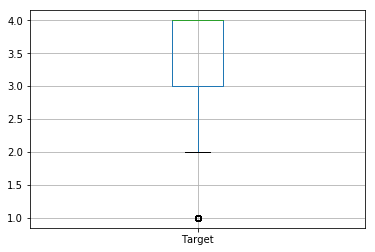

In [28]:
#outlier detection 
df_train.boxplot('Target')

,hacdor,rooms,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,r4m2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
hacdor,1.000000,-0.233369,-0.175011,-0.101965,-0.084680,0.232508,0.059313,0.184857,0.268978,0.142458,...,-0.109862,-0.102725,0.350546,-0.082229,0.388043,0.794699,0.005278,-0.099127,-0.102725,-0.191714
rooms,-0.233369,1.000000,0.129183,0.130531,0.254256,-0.066578,0.267627,0.195222,-0.032558,0.241989,...,0.233679,0.068288,0.221595,0.198890,0.007952,-0.355526,-0.027575,0.249956,0.068288,0.226208
v14a,-0.175011,0.129183,1.000000,0.143143,0.036396,-0.054769,0.018133,-0.015552,-0.006370,0.038997,...,0.036483,0.023831,0.009100,0.018897,-0.015193,-0.174969,0.005712,0.034702,0.023831,0.063382
refrig,-0.101965,0.130531,0.143143,1.000000,0.086002,-0.047087,-0.022819,-0.046860,-0.023502,0.027832,...,0.097128,0.025846,-0.052195,0.082159,-0.108718,-0.123054,-0.034080,0.117378,0.025846,0.126792
v18q,-0.084680,0.254256,0.036396,0.086002,1.000000,-0.024318,-0.014489,-0.026559,0.038250,0.013104,...,0.250477,-0.054670,-0.016430,0.282619,-0.050562,-0.125936,-0.071504,0.302801,-0.054670,0.238864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SQBovercrowding,0.794699,-0.355526,-0.174969,-0.123054,-0.125936,0.355660,0.144478,0.329636,0.348197,0.224291,...,-0.201253,-0.218349,0.475192,-0.106004,0.477876,1.000000,-0.049525,-0.150949,-0.218349,-0.258744
SQBdependency,0.005278,-0.027575,0.005712,-0.034080,-0.071504,-0.036977,-0.157357,-0.158375,-0.012610,-0.139875,...,-0.049172,0.395814,-0.104255,-0.032319,0.049113,-0.049525,1.000000,-0.065314,0.395814,-0.081695
SQBmeaned,-0.099127,0.249956,0.034702,0.117378,0.302801,-0.083475,-0.062164,-0.102002,-0.054084,0.071792,...,0.510778,-0.112277,-0.067473,0.470882,-0.009583,-0.150949,-0.065314,1.000000,-0.112277,0.276498
agesq,-0.102725,0.068288,0.023831,0.025846,-0.054670,-0.272690,-0.054712,-0.203856,-0.281166,-0.128033,...,0.051899,1.000000,-0.238110,-0.018314,-0.278921,-0.218349,0.395814,-0.112277,1.000000,0.075299


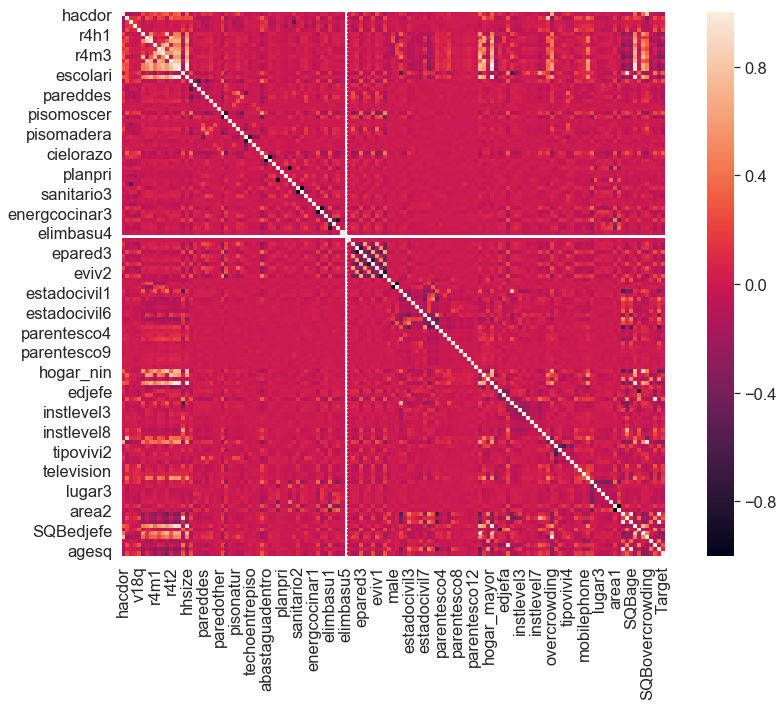

In [29]:
# check correlation
display(df_train.corr())
print()
#using heatmap
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,10))
import seaborn as sns
sns.set(style='white',color_codes=True ,font_scale=1.5)
sns.heatmap(df_train.corr() ,square=True)

# Identify the output variable and features or independent variable 

In [30]:
df_test.drop('Id',axis=1,inplace=True)
df_train_X = df_train.drop(['Id','Target'],axis=1)
df_train_y= df_train.Target

In [31]:
df_train_y.value_counts()

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

# Predict the accuracy using random forest classifier.

In [32]:
#initialize the model
RF_classifier = RandomForestClassifier()
#fit the training the data
RF_classifier.fit(df_train_X,df_train_y)
# now predict
RF_predict = RF_classifier.predict(df_test)

In [33]:
# now check for accuracy
display(df_train_X.shape)
print()
display(df_test.shape)

(9557, 136)

(23856, 136)

In [37]:
metrics.accuracy_score(df_train_y,RF_predict[:9557])

0.5366746887098461

In [39]:
# classification report , check accuracy for each class
print(metrics.classification_report(df_train_y,RF_predict[:9557]))

              precision    recall  f1-score   support

           1       0.10      0.04      0.05       755
           2       0.18      0.11      0.14      1597
           3       0.08      0.03      0.05      1209
           4       0.63      0.81      0.71      5996

    accuracy                           0.54      9557
   macro avg       0.25      0.25      0.24      9557
weighted avg       0.44      0.54      0.48      9557



In [40]:
df_train_y.value_counts()

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

In [41]:
# data is imbalance we need to resample it and predict again
from sklearn.utils import resample
df_train_majority = df_train[df_train.Target==4]
df_train_minority_3 = df_train[df_train.Target==3] 
df_train_minority_2 = df_train[df_train.Target==2] 
df_train_minority_1 = df_train[df_train.Target==1] 
df_resample_minority_3 = resample(df_train_minority_3 ,replace=True,n_samples=5996,random_state=10)
df_resample_minority_2 = resample(df_train_minority_2 ,replace=True,n_samples=5996,random_state=10)
df_resample_minority_1 = resample(df_train_minority_1 ,replace=True,n_samples=5996,random_state=10)

df_resample_upsample = pd.concat([df_train_majority,df_resample_minority_3,df_resample_minority_2,df_resample_minority_1])

In [42]:
df_resample_upsample.Target.value_counts()

4    5996
3    5996
2    5996
1    5996
Name: Target, dtype: int64

In [43]:
# separate the target and feature variable
df_train_rsmpl_X =df_resample_upsample.drop(['Id','Target'],axis=1)
df_train_rsmpl_y= df_resample_upsample.Target

In [47]:
# now predict
#fit the training the data
RF_classifier.fit(df_train_rsmpl_X,df_train_rsmpl_y)
# now predict
RF_predict_rsmpl = RF_classifier.predict(df_test)
#accuracy
display(metrics.accuracy_score(df_train_rsmpl_y[:23856],RF_predict_rsmpl))
print()
# classification report , check accuracy for each class
print(metrics.classification_report(df_train_rsmpl_y[:23856],RF_predict_rsmpl))

0.2855466130114017


              precision    recall  f1-score   support

           1       0.43      0.11      0.18      5868
           2       0.26      0.16      0.20      5996
           3       0.20      0.05      0.08      5996
           4       0.29      0.82      0.42      5996

    accuracy                           0.29     23856
   macro avg       0.29      0.28      0.22     23856
weighted avg       0.29      0.29      0.22     23856



# now apply the grid search CV

In [48]:

RF_classifier

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [49]:
param_grid={'n_estimators':[20,40,60,80] ,'max_depth':[4,6,8,10],'max_features':[10,20,30,40],'criterion':['gini','entropy']}
gcv =GridSearchCV(RandomForestClassifier(),param_grid ,refit=True)
gcv.fit(df_train_rsmpl_X,df_train_rsmpl_y) # fit the training data
gcv_predict = gcv.predict(df_test)

In [50]:
# check for best parameter 
print(gcv.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 30, 'n_estimators': 60}


In [51]:
#accuracy and classification metrix
display(metrics.accuracy_score(df_train_rsmpl_y[:23856],RF_predict_rsmpl))
print()
# classification report , check accuracy for each class
print(metrics.classification_report(df_train_rsmpl_y[:23856],RF_predict_rsmpl))

0.2855466130114017


              precision    recall  f1-score   support

           1       0.43      0.11      0.18      5868
           2       0.26      0.16      0.20      5996
           3       0.20      0.05      0.08      5996
           4       0.29      0.82      0.42      5996

    accuracy                           0.29     23856
   macro avg       0.29      0.28      0.22     23856
weighted avg       0.29      0.29      0.22     23856

